In [110]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [111]:
(images,target),(_,_) = fashion_mnist.load_data()

In [112]:
images= images[:20000]
target = target[:20000]

In [113]:
images.shape

(20000, 28, 28)

In [114]:
image_flatten = images.reshape(20000,-1)

In [115]:
image_flatten.shape

(20000, 784)

## Normalisation

In [116]:
scale = StandardScaler()

image_scaled = scale.fit_transform(image_flatten)

## Division de donnée

In [117]:
X_train,X_test, Y_train,Y_test = train_test_split(image_scaled,target ,random_state=42 ,test_size=0.2)

In [118]:
X_train.shape

(16000, 784)

In [119]:
np.unique(target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Contruction de model

In [120]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [121]:
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [122]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [123]:
Y_train= Y_train.reshape(-1,1)

In [124]:
Y_train.shape

(16000, 1)

In [125]:
history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_split=0.2)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8015 - loss: 0.5574 - val_accuracy: 0.8253 - val_loss: 0.4609
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8567 - loss: 0.3797 - val_accuracy: 0.8444 - val_loss: 0.4247
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8792 - loss: 0.3265 - val_accuracy: 0.8441 - val_loss: 0.4373
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8987 - loss: 0.2715 - val_accuracy: 0.8575 - val_loss: 0.4168
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9047 - loss: 0.2494 - val_accuracy: 0.8431 - val_loss: 0.4643
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9186 - loss: 0.2184 - val_accuracy: 0.8619 - val_loss: 0.4217
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9244 - loss: 0.1980 - val_accuracy: 0.8637 - val_loss: 0.4242
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9330 - loss: 0.1798 - val_accuracy

In [126]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [127]:
loss = history.history['loss']
accuracy = history.history['accuracy']
validation = history.history['val_accuracy']

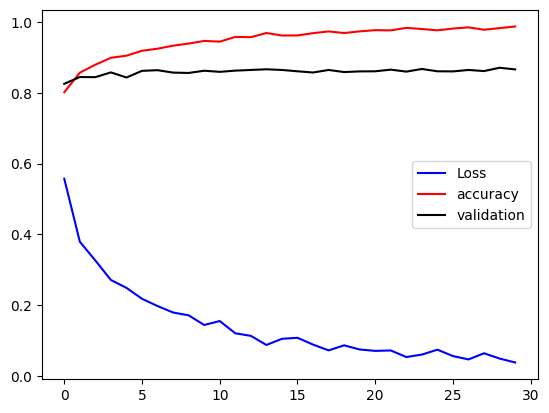

In [128]:
plt.plot(loss ,color='blue' ,label = 'Loss')
plt.plot(accuracy ,color = 'red' ,label='accuracy')
plt.plot(validation ,color='black',label='validation')
plt.legend()
plt.show()

In [129]:
prediction = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [130]:
pred = []
for i in range(len(prediction)):
    pred.append(int(np.argmax(prediction[i])))



In [131]:
true = 0
false = 0

for i,j in zip(Y_test,pred):
    if i == j:
        true = true + 1
    else:
        false = false + 1

print(f" On trouve {true} vraies et {false} fausse pour notre teste et de score {true/(true+false)}")

 On trouve 3486 vraies et 514 fausse pour notre teste et de score 0.8715
